### Student Information
Name: 陳恒安

Student ID: 110033637

GitHub ID: andy1124

Kaggle name: 王爸爸狗園 (ID:Heng An Chen)

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [1]:
### Begin Assignment Here

## First Part - DM2021-Lab2-master

---
### 1. Data Preparation

#### 1.1 Load data

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

Data preprocessing

In [7]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

# Transform the sentence into a term-sentence matrix 
# Produce the word frequency vector for each document
train_count_vect = CountVectorizer()
test_count_vect = CountVectorizer()
train_counts = train_count_vect.fit_transform(train_df.text)
test_counts  = test_count_vect.fit_transform(test_df.text)

# Convert the sparse matrix(train_counts) into a dataframe
df_counts_train = pd.DataFrame(train_counts.toarray())
train_counts_sum = df_counts_train.sum()
# Sort the data frame column based on the word frequency
df_counts_train = df_counts_train[train_counts_sum.sort_values(ascending=False).index[:]]
# Store the feature names(word) into a list
idx_list_train = list(df_counts_train.columns)


# Convert the sparse matrix(test_counts) into a dataframe
df_counts_test = pd.DataFrame(test_counts.toarray())
test_counts_sum = df_counts_test.sum()
# Sort the data frame column based on the word frequency
df_counts_test = df_counts_test[test_counts_sum.sort_values(ascending=False).index[:]]
# Store the feature names(word) into a list
idx_list_test = list(df_counts_test.columns)

Plot result

In [8]:
import plotly.express as px

train_term_freq = train_counts_sum.tolist()
test_term_freq = test_counts_sum.tolist()

px_x = train_count_vect.get_feature_names_out()[idx_list_train[0:30]]
px_y = [train_term_freq[i] for i in idx_list_train[0:30]]

fig = px.bar(x=px_x, y=px_y, category_orders = px_x, 
             labels={'x':'Feature names', 'y':'Frequencies'}, title="Top 30 most frequently appearing features (Train dataset)")
fig.show()

px_x = test_count_vect.get_feature_names_out()[idx_list_test[0:30]]
px_y = [test_term_freq[i] for i in idx_list_test[0:30]]

fig = px.bar(x=px_x, y=px_y, category_orders = px_x, 
             labels={'x':'Feature names', 'y':'Frequencies'}, title="Top 30 most frequently appearing features (Test dataset)")
fig.show()

---
### 2. Feature engineering

Using Bag of Words

In [15]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\pigki\anaconda3\envs\dm\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

Show the TF-IDF matrix

In [18]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF features
TFIDF_1000 = TfidfVectorizer(smooth_idf=True, max_features=1000)
TFIDF_1000.fit(train_df['text'])
x = TFIDF_1000.transform(train_df['text'])
tfidf = pd.DataFrame(x.toarray(), columns=TFIDF_1000.get_feature_names_out())
tfidf

,10,100,12,15,17,20,2016,30,70,about,...,years,yes,yesterday,yet,yo,you,young,your,yourself,youtube
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.195391,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.336455,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,0.0,0.0,0.466517,0.0,0.0,0.0,0.0,0.484985,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3609,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3610,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3611,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Show the features name for features [100:110]

In [19]:
tfidf_feature_names = TFIDF_1000.get_feature_names()
tfidf_feature_names[100:110]

C:\Users\pigki\anaconda3\envs\dm\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
### 3. Model

#### 3.1 Decision Trees

Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  

In [20]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [21]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'joy', 'anger', 'fear', 'anger', 'sadness',
       'anger', 'fear', 'anger'], dtype=object)

---
### 4. Results Evaluation

Now we will check the results of our model's performance

In [22]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [23]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [24]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [25]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

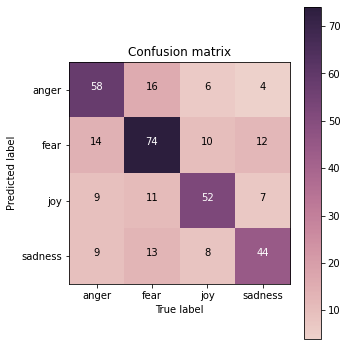

In [26]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [27]:
# Answer Below

Interpretation:

The diagonal elements of the confusion matrix mean the number of correct prediction for the certain emotion. As we can see, the fear emotion shows a good classification result (74 corret prediction). 

The non-diagonal elements of the matrix record the misclassification of our model.Futhermore, we can see which emotion have been most misclassified. From the (row=anger, col=fear), the number 16 means that the fear emotion have been misclassified into anger 16 times. Hence, we can know the semantic meaning of fear and anger may look alike from the point of view of our model. 

Anger and joy, which are two very different emotions, have only be misclassified 6 times. Therefore, we can say that the model can still capture some of the semantic meaning.However, although the results above may have some misclassification, the overall accuracy is relatively high. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Naive Bayes classifier built by BOW

In [28]:
# Answer here
# Use the TF-IDF features to build the multinomial Naive Bayes classifier.
from sklearn.naive_bayes import MultinomialNB
print("Multinomial Naive Bayes classifier")

# Use the word frequency features to build the multinomial Naive Bayes classifier.
MNB_bow = MultinomialNB()
MNB_bow.fit(X_train, y_train)

bow_pred_train = MNB_bow.predict(X_train)
bow_pred_test  = MNB_bow.predict(X_test)

bow_acc_train = accuracy_score(y_true=y_train, y_pred=bow_pred_train)
bow_acc_test  = accuracy_score(y_true=y_test,  y_pred=bow_pred_test)

print('(BOW 500)training accuracy: {}'.format(round(bow_acc_train, 2)))
print('(BOW 500)testing  accuracy: {}'.format(round(bow_acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=bow_pred_test))

Multinomial Naive Bayes classifier
(BOW 500)training accuracy: 0.79
(BOW 500)testing  accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



[[56 14  5  9]
 [ 9 85  5 11]
 [10  8 55  6]
 [12 10  6 46]]


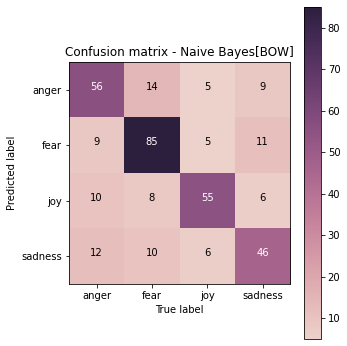

In [29]:
cm_bow = confusion_matrix(y_true=y_test, y_pred=bow_pred_test) 
print(cm_bow)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_bow, classes=my_tags, title='Confusion matrix - Naive Bayes[BOW]')

Naive Bayes classifier built by TF-IDF

In [30]:
# Use the TF-IDF features to build the Gaussian Naive Bayes classifier.
X_train_tfidf = TFIDF_1000.transform(train_df['text'])
X_test_tfidf = TFIDF_1000.transform(test_df['text'])

MNB_tfidf = MultinomialNB()
MNB_tfidf.fit(X_train_tfidf, y_train)

tfidf_pred_train = MNB_tfidf.predict(X_train_tfidf)
tfidf_pred_test  = MNB_tfidf.predict(X_test_tfidf)

tfidf_acc_train = accuracy_score(y_true=y_train, y_pred=tfidf_pred_train)
tfidf_acc_test  = accuracy_score(y_true=y_test,  y_pred=tfidf_pred_test)

print('(TFIDF 1000)training accuracy: {}'.format(round(tfidf_acc_train, 2)))
print('(TFIDF 1000)testing  accuracy: {}'.format(round(tfidf_acc_test, 2)))
print(classification_report(y_true=y_test, y_pred=tfidf_pred_test))

(TFIDF 1000)training accuracy: 0.87
(TFIDF 1000)testing  accuracy: 0.77
              precision    recall  f1-score   support

       anger       0.79      0.71      0.75        84
        fear       0.68      0.91      0.78       110
         joy       0.87      0.75      0.80        79
     sadness       0.85      0.64      0.73        74

    accuracy                           0.77       347
   macro avg       0.80      0.75      0.76       347
weighted avg       0.79      0.77      0.77       347



[[ 60  14   6   4]
 [  8 100   1   1]
 [  5  12  59   3]
 [  3  22   2  47]]


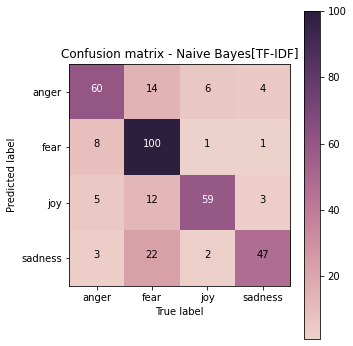

In [31]:
cm_tfidf = confusion_matrix(y_true=y_test, y_pred=tfidf_pred_test) 
print(cm_tfidf)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_tfidf, classes=my_tags, title='Confusion matrix - Naive Bayes[TF-IDF]')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [32]:
# Answer below

Interpretation:


| F1-score                | anger | fear |  joy | sadness | avg F1-score |
|-------------------------|:-----:|:----:|:----:|:-------:|:------------:|
| Decision Tree - BOW500  |  0.67 | 0.66 | 0.67 |   0.62  |     0.66     |
| Naive Bayes - BOW500    |  0.65 | 0.75 | 0.73 |   0.63  |     0.69     |
| Naive Bayes - TFIDF1000 |  0.75 | 0.78 | 0.80 |   0.73  |     0.76     |

From the table above, we can see the performance of Naive Bayes classifier are better than the Decision Tree model no matter using the BOW or TFIDF features. 

[Naive Bayes]<br>
The Naive Bayes classifier is a probabilistic model based on Bayes’ theorem which is used to calculate the probability P(A|B) of an event A occuring, when we are given some prior knowledge B. The major advantage of Naive Bayes is the independence assumption. This means that we assume that each feature’s value does not influence other features’ values. This assumption can help us to reduce the number of computations and the required data set, which can avoid the overfitting problem.

[Decision Tree]<br>
A decision tree is contructed by a collection of value checks on each feature. Then, we can output a decision based on the given attributes and the inference process. For the decision tree, we can utilize different ways to find out the best split of the features (e.g. Entropy, Gini index). The most siginificant advantage of decision tree is the explainability.

[Comparison]<br>
Decision tree is be benefit for its simple reasoning and interpretation. But in text classification problem, the complicated data or sequence data may let decision tree have the difficulty making the right decision. On the other hand, the Naive Bayes classifier (MultinomialNB) is suitable for classification with discrete features (e.g., word counts for text classification).


---
### 6. Deep Learning

#### 6.1 Prepare data (X, y)

In [33]:
# import keras
from tensorflow import keras 
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


#### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.

In [34]:
## deal with label (string -> one-hot)
# from tensorflow.keras import utils as np_utils
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1387       fear
2187        joy
3460    sadness
1898       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


#### 6.3 Build model

In [35]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                 0     

#### 6.4 Train

In [37]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 3s 12ms/step - loss: 1.3571 - accuracy: 0.3246 - val_loss: 1.2795 - val_accuracy: 0.4236
Epoch 2/25
113/113 [==============================] - 0s 4ms/step - loss: 1.0588 - accuracy: 0.6173 - val_loss: 0.9784 - val_accuracy: 0.6196
Epoch 3/25
113/113 [==============================] - 0s 4ms/step - loss: 0.6237 - accuracy: 0.8021 - val_loss: 0.8083 - val_accuracy: 0.6772
Epoch 4/25
113/113 [==============================] - 0s 4ms/step - loss: 0.4133 - accuracy: 0.8492 - val_loss: 0.8212 - val_accuracy: 0.6744
Epoch 5/25
113/113 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8820 - val_loss: 0.8611 - val_accuracy: 0.6628
Epoch 6/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2641 - accuracy: 0.9105 - val_loss: 0.9186 - val_accuracy: 0.6715
Epoch 7/25
113/113 [==============================] - 0s 4ms/step - loss: 0.2262 - accuracy: 0.9284 - val_loss: 0.9843 - val_accuracy: 0.6715
Epoch

#### 6.5 Predict on testing data

In [38]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[1.3476945e-02, 9.3379355e-04, 4.5097046e-09, 9.8558921e-01],
       [9.9993241e-01, 3.5973261e-07, 6.9974590e-06, 6.0271115e-05],
       [2.5542984e-02, 8.4129766e-02, 8.9004278e-01, 2.8446646e-04],
       [5.9359145e-01, 8.5936829e-02, 2.6142055e-01, 5.9051137e-02],
       [4.8643326e-08, 9.9999964e-01, 4.7732013e-10, 3.4190913e-07]],
      dtype=float32)

In [39]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'anger', 'joy', 'anger', 'fear'], dtype=object)

In [40]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.64


In [41]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.382231,1.319188,0.423631,1.279454
1,1,0.651536,0.975863,0.619597,0.978387
2,2,0.799336,0.585512,0.677233,0.808253
3,3,0.842790,0.420935,0.674352,0.821247
4,4,0.877664,0.336260,0.662824,0.861115
5,5,0.900913,0.280692,0.671470,0.918561
6,6,0.923609,0.231647,0.671470,0.984259
7,7,0.933850,0.200211,0.674352,1.016615
8,8,0.947966,0.169901,0.657061,1.096659
9,9,0.955715,0.145194,0.677233,1.147050


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

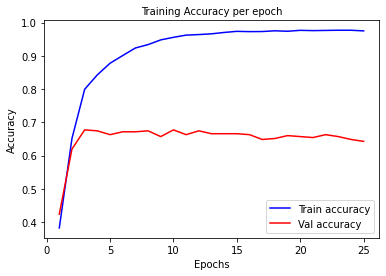

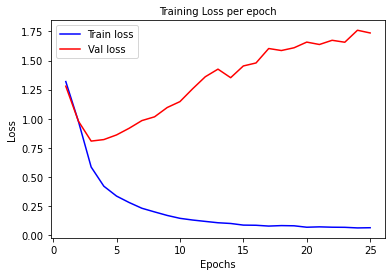

In [42]:
# Answer here

# Plot the training and validation accuracy
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Training Accuracy per epoch', fontsize=10)
x = np.arange(1, len(training_log.accuracy)+1, 1)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(x, training_log.accuracy, color='b', label='Train accuracy',linewidth=1.5)
plt.plot(x, training_log.val_accuracy,  color='r', label='Val accuracy', linewidth=1.5)
plt.ylabel('Accuracy', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.legend()
plt.show()

# Plot the training and validation loss
plt.rcParams["figure.figsize"] = (6,4)
plt.title('Training Loss per epoch', fontsize=10)
x = np.arange(1, len(training_log.loss)+1, 1)
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.plot(x, training_log.loss, color='b', label='Train loss',linewidth=1.5)
plt.plot(x, training_log.val_loss,  color='r', label='Val loss', linewidth=1.5)
plt.ylabel('Loss', fontsize=10)
plt.xlabel('Epochs', fontsize=10)
plt.legend()
plt.show()

Interpretation:


The above results show that as the training accuracy increase, the validation accuracy doesn't increase as well after the fifth epoch. Although our model can achieve 97.6% training accuracy, the validation accuracy is only about 64.8%. From the point of view of accuracy, we have doubt about the performance of model.


On the other hand, we can clearly see the problem of overfitting from the loss plot. The loss plot shows that the training loss is decreasing but the validation loss increasing, which cause the gap between training and validation loss become larger. The large gap also means poor generalization performance of our predictive model, and this is the problem of overfitting.

---
### 7. Word2Vector

#### 7.1 Prepare training corpus

In [43]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1387,20530,@jk_rowling never thought an angry oompa loomp...,"[@, jk_rowling, never, thought, an, angry, oom..."
2187,30183,"It's finally raining in Ashland, Oregon. We've...","[It, 's, finally, raining, in, Ashland, ,, Ore..."
3460,40633,#sober life,"[#, sober, life]"
1898,21041,@RobdotThom @sulphurhoops in fact they need to...,"[@, RobdotThom, @, sulphurhoops, in, fact, the..."
1804,20947,"@humeraslam @MehrTarar @sherryrehman , yes, al...","[@, humeraslam, @, MehrTarar, @, sherryrehman,..."


In [44]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'jk_rowling', 'never', 'thought', 'an', 'angry', 'oompa', 'loompa', 'would', 'be', 'my', 'Boggart', ',', 'but', 'there', 'you', 'have', 'it', '.', '#', 'boggart', '#', 'PresidentTrump']),
       list(['It', "'s", 'finally', 'raining', 'in', 'Ashland', ',', 'Oregon', '.', 'We', "'ve", 'been', 'parched', 'all', 'summer', '&', 'amp', ';', 'fall', '.', 'The', 'plants', '&', 'amp', ';', 'people', 'are', 'rejoicing', '!']),
       list(['#', 'sober', 'life'])], dtype=object)

#### 7.2 Training our model


You can try to train your own model.

In [45]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1387,20530,@jk_rowling never thought an angry oompa loomp...,"[@, jk_rowling, never, thought, an, angry, oom..."
2187,30183,"It's finally raining in Ashland, Oregon. We've...","[It, 's, finally, raining, in, Ashland, ,, Ore..."
3460,40633,#sober life,"[#, sober, life]"
1898,21041,@RobdotThom @sulphurhoops in fact they need to...,"[@, RobdotThom, @, sulphurhoops, in, fact, the..."
1804,20947,"@humeraslam @MehrTarar @sherryrehman , yes, al...","[@, humeraslam, @, MehrTarar, @, sherryrehman,..."


In [46]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

#### 7.3 Generating word vector (embeddings)

In [47]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.87842536,  0.28879052, -0.1709789 , -0.21022758,  0.31856218,
       -1.4152989 ,  0.7702607 ,  1.455878  , -0.45841327, -0.68098307,
       -0.31331578, -1.1540208 , -0.30319253,  0.5064217 , -0.48105064,
       -0.40890077,  0.4776596 , -0.14160113,  0.5834543 , -0.78528696,
        0.00771195,  0.8256803 ,  0.40244043,  0.04188194,  0.04060641,
        0.13194029, -0.17611295,  0.55025995, -0.40473828, -0.1778639 ,
        0.58282864,  0.3222826 ,  0.43662748, -0.626949  , -0.00646977,
        0.138451  ,  0.3552807 ,  0.08935023, -0.1596328 , -0.2955373 ,
        0.319148  ,  0.25938627, -0.29347926,  0.47271875,  0.7280184 ,
        0.02923596, -1.049983  , -0.23927568,  0.38274804,  0.3689221 ,
       -0.16839957, -0.37596568, -0.45537764, -0.16041031, -0.55122495,
       -0.50771266,  0.07185438,  0.0824747 , -0.11247148,  0.08007758,
        0.39123702, -0.18739729,  0.4448861 ,  0.14790529, -0.9402248 ,
        0.6773669 ,  0.00320934,  0.6352195 , -1.1447644 ,  0.37

In [48]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Really', 0.9267889261245728),
 ('worthy', 0.9164230823516846),
 ('free', 0.9128519296646118),
 ('shudder', 0.9126384854316711),
 ('Be', 0.9125131368637085),
 ('help', 0.9122111797332764),
 ('bday', 0.9116401076316833),
 ('Makes', 0.9091809391975403),
 ('muslims', 0.9058915376663208),
 ('cry', 0.9056642651557922)]

#### 7.4 Using a pre-trained w2v model

In [49]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

##### (2) Using gensim api

In [50]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

#### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [51]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

In [52]:
# Answer Below

Word2Vec is to represent a word into vector. After the training process, we can get the relationship between each word based on the word vectors. Howeverm, we will meet some challenges when we try to use these word vectors generated by Word2Vec to represent the sentence data.


First of all, from the dataset we know that the length of each sentence is different. If we combine several word vectors into a single matrix, the matrix will be sparse for the sentences which have shorter setence length. A sparse matrix can increase both the computational and memory resources, which is not a appropriate. To deal with this problem, there are differet methods to help us to get the sentence vectors.

1. Doc2Vec : Train the dataset using Doc2Vec and then use the sentence vectors.
2. Average of Word2Vec vectors : Take the average of all the word vectors in a sentence. This average vector will represent the sentence vector.

After doing these sentence embedding process, we can use these vectors as the model input to train our model.

---
### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

In [53]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [54]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [55]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [56]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

---
### 9. High-dimension Visualization: t-SNE

#### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happpy words
- angry words
- data words
- mining words

In [57]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


#### 9.2 Plot using t-SNE (2-dimension)

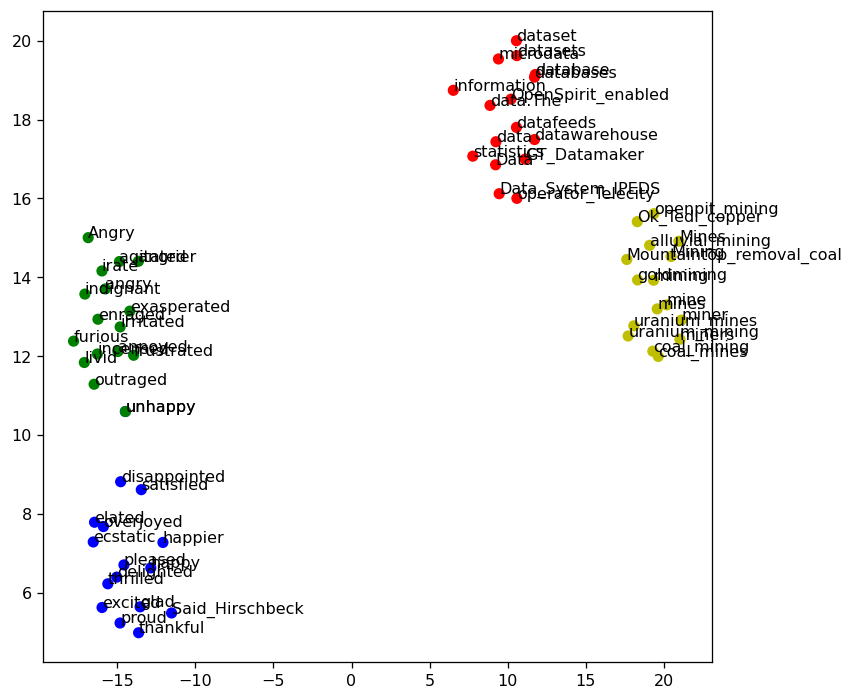

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
# all_word = list(model.vocab.keys()) ## Old Gensim version can't be used
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

Prepare data lists like:
- happpy words
- angry words
- data words
- mining words

In [58]:
# Answer here
topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('\nangry_words: ', angry_words)
print('\ndata_words: ', data_words)
print('\nmining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']

data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'information', 'database', 'Data_System_IPEDS', 'data.The', 'OpenSpirit_enabled', 'datafeeds', 'microdata', 'operator_Telecity', 'GT_Datamaker', 'datawarehouse']

mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner', 'uranium_mining', 'miners', 'Mountaintop_removal_coal', 'goldmining', 'alluvial_mining', 'Ok_Tedi_copper', 'uranium_mines', 'coal_mines', 'openpit_mining', 'Mines']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'deligh

Plot using t-SNE (2-dim)

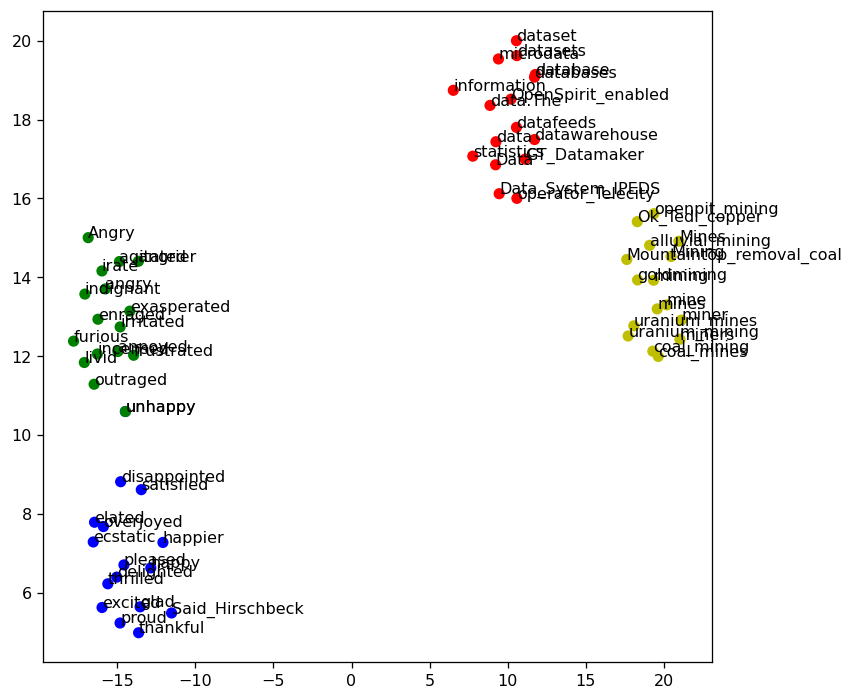

In [61]:
## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Second Part - Kaggle Competition Screanshot

![Imgur](img/pic0.png)

## Third Part - Kaggle Competition Report

### 1. Data preparation

#### 1.1 Load Data

In [ ]:
import pandas as pd

df = pd.read_csv('tweets_DM.csv') 
df = df.drop(['_index', '_crawldate', '_type'], axis = 1)
df

,_score,hashtags,tweet_id,text
0,391,['Snapchat'],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,"['freepress', 'TrumpLegacy', 'CNN']",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,['bibleverse'],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...
1867530,827,"['mixedfeeling', 'butimTHATperson']",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [ ]:
df_emotion = pd.read_csv('emotion.csv') 
df_emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [ ]:
df_identification = pd.read_csv('data_identification.csv') 
df_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [ ]:
df_train_id = df_identification[df_identification['identification'] == 'train']
df_test_id  = df_identification[df_identification['identification'] == 'test']

In [ ]:
train_id_list = df_train_id['tweet_id'].tolist()
test_id_list = df_test_id['tweet_id'].tolist()
print('The number of train data:',len(train_id_list))
print('The number of test data:',len(test_id_list))

The number of train data: 1455563
The number of test data: 411972


In [ ]:
df_train = pd.merge(df.loc[df['tweet_id'].isin(train_id_list)], df_emotion, on='tweet_id')
df_train

,_score,hashtags,tweet_id,text,emotion
0,391,['Snapchat'],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,433,"['freepress', 'TrumpLegacy', 'CNN']",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,376,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,120,"['authentic', 'LaughOutLoud']",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,1021,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation
...,...,...,...,...,...
1455558,94,"['NoWonder', 'Happy']",0x321566,I'm SO HAPPY!!! #NoWonder the name of this sho...,joy
1455559,627,[],0x38959e,In every circumtance I'd like to be thankful t...,joy
1455560,274,['blessyou'],0x2cbca6,there's currently two girls walking around the...,joy
1455561,840,[],0x24faed,"Ah, corporate life, where you can date <LH> us...",joy


In [ ]:
df_test = df.loc[df['tweet_id'].isin(test_id_list)]
df_test

,_score,hashtags,tweet_id,text
2,232,['bibleverse'],0x28b412,"Confident of your obedience, I write to you, k..."
4,989,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
9,66,"['materialism', 'money', 'possessions']",0x218443,When do you have enough ? When are you satisfi...
30,104,"['GodsPlan', 'GodsWork']",0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
33,310,[],0x26289a,"In these tough times, who do YOU turn to as yo..."
...,...,...,...,...
1867525,602,[],0x2913b4,"""For this is the message that ye heard from th..."
1867529,598,[],0x2a980e,"""There is a lad here, which hath five barley l..."
1867530,827,"['mixedfeeling', 'butimTHATperson']",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,[],0x29d0cb,I swear all this hard work gone pay off one da...


#### 1.2 EDA

Check the distribution of emotion

C:\Users\pigki\anaconda3\envs\dm\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

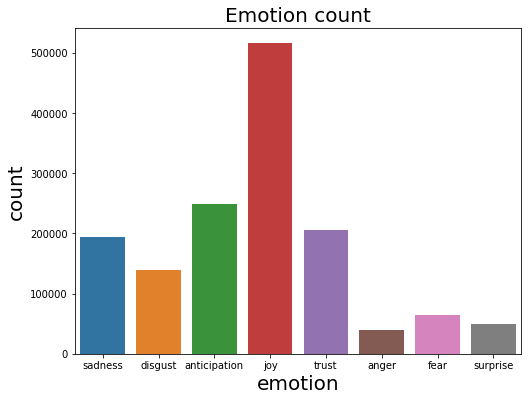

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sns.countplot(df_emotion.emotion)
# plt.show()
plt.subplots(figsize=(8, 6))

g = sns.countplot(df_emotion.emotion)
g.set_title('Emotion count', fontsize=20)
g.set_xlabel('emotion', fontsize=20)
g.set_ylabel('count', fontsize=20)

### 2. Methods

#### 2.1 Decision Trees

##### 2.1.1 Decision Trees Process

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(df_train, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.metrics import accuracy_score


# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(df_train['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(df_train['text'])
y_train = df_train['emotion']

X_valid = BOW_500.transform(df_valid['text'])
y_valid = df_valid['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_valid.shape: ', X_valid.shape)
print('y_valid.shape: ', y_valid.shape)

C:\Users\pigki\anaconda3\envs\dm\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train.shape:  (1164450, 500)
y_train.shape:  (1164450,)
X_valid.shape:  (291113, 500)
y_valid.shape:  (291113,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_valid_pred = DT_model.predict(X_valid)

## so we get the pred result
y_train_pred[:10]
y_valid_pred[:10]

array(['anger', 'sadness', 'trust', 'joy', 'disgust', 'joy', 'disgust',
       'trust', 'joy', 'trust'], dtype=object)

In [ ]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_valid = accuracy_score(y_true=y_valid, y_pred=y_valid_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('validation accuracy: {}'.format(round(acc_valid, 2)))

training accuracy: 0.97
validation accuracy: 0.4


##### 2.1.2 Decision Trees Results

In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_valid, y_pred=y_valid_pred))

              precision    recall  f1-score   support

       anger       0.16      0.13      0.15      8058
anticipation       0.44      0.44      0.44     49915
     disgust       0.25      0.25      0.25     27781
        fear       0.20      0.19      0.19     12754
         joy       0.53      0.56      0.55    103328
     sadness       0.34      0.33      0.34     38512
    surprise       0.22      0.17      0.19      9777
       trust       0.32      0.30      0.31     40988

    accuracy                           0.40    291113
   macro avg       0.31      0.30      0.30    291113
weighted avg       0.40      0.40      0.40    291113



#### 2.2 Naive Bayes

##### 2.2.1 Naive Bayes Process

In [ ]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop = stopwords.words('english')
df_train['text_new'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
# TF-IDF features
TFIDF_1000 = TfidfVectorizer(smooth_idf=True, tokenizer=nltk.word_tokenize, max_features=1000)
TFIDF_1000.fit(df_train['text_new'])
x = TFIDF_1000.transform(df_train['text_new'])
tfidf = pd.DataFrame(x.toarray(), columns=TFIDF_1000.get_feature_names_out())
tfidf

,!,#,$,%,&,','','d,'ll,'m,...,😊,😍,😘,😩,😭,🙄,🙏,🙏🏽,🙏🏾,🤔
0,0.000000,0.101430,0.0,0.0,0.0,0.0,0.270701,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.275563,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.528792,0.217029,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455558,0.623248,0.153477,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.206767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455559,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.402739,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455560,0.000000,0.106902,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455561,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(df_train, test_size=0.2)

##### 2.2.2 Naive Bayes Results

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# Use the TF-IDF features to build the Gaussian Naive Bayes classifier.
X_train_tfidf = TFIDF_1000.transform(df_train['text_new'])
X_valid_tfidf = TFIDF_1000.transform(df_valid['text_new'])

y_train = df_train['emotion']
y_valid = df_valid['emotion']

MNB_tfidf = MultinomialNB()
MNB_tfidf.fit(X_train_tfidf, y_train)

tfidf_pred_train = MNB_tfidf.predict(X_train_tfidf)
tfidf_pred_valid  = MNB_tfidf.predict(X_valid_tfidf)

tfidf_acc_train = accuracy_score(y_true=y_train, y_pred=tfidf_pred_train)
tfidf_acc_valid  = accuracy_score(y_true=y_valid,  y_pred=tfidf_pred_valid)

print('(TFIDF 1000)training accuracy: {}'.format(round(tfidf_acc_train, 2)))
print('(TFIDF 1000)validing  accuracy: {}'.format(round(tfidf_acc_valid, 2)))
print(classification_report(y_true=y_valid, y_pred=tfidf_pred_valid))

(TFIDF 1000)training accuracy: 0.46
(TFIDF 1000)validing  accuracy: 0.46
              precision    recall  f1-score   support

       anger       0.85      0.04      0.08      7935
anticipation       0.59      0.35      0.44     49724
     disgust       0.52      0.15      0.23     27816
        fear       0.86      0.16      0.27     12865
         joy       0.43      0.92      0.58    103141
     sadness       0.50      0.31      0.38     38592
    surprise       0.85      0.08      0.15     10004
       trust       0.71      0.08      0.14     41036

    accuracy                           0.46    291113
   macro avg       0.66      0.26      0.28    291113
weighted avg       0.56      0.46      0.39    291113



#### 2.3 MLP

##### 2.3.1 MLP Process

In [ ]:
## deal with label (string -> one-hot)
import numpy as np
import keras
from keras import utils as np_utils
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_valid.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_valid = label_encode(label_encoder, y_valid)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_valid.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 404944     anticipation
1430813           trust
698789     anticipation
859519     anticipation
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]

y_train.shape:  (1164450, 8)
y_test.shape:  (291113, 8)


In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  8


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=128)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=128)(H1)  # 64
H2 = ReLU()(H1_W2)

# 3nd hidden layer
H2_W3 = Dense(units=128)(H2)  # 64
H3 = ReLU()(H2_W3)

# output layer
H3_W4 = Dense(units=output_shape)(H3)  # 4
H4 = Softmax()(H3_W4)

model_output = H4

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 128)               64128     
                                                                 
 re_lu_2 (ReLU)              (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_3 (ReLU)              (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 re_lu_4 (ReLU)              (None, 128)               0   

In [ ]:
from keras.callbacks import CSVLogger

# csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data = (X_valid, y_valid))
print('training finish')

Epoch 1/25


C:\Users\pigki\anaconda3\envs\dm\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_1/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_1/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/model_1/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


36390/36390 [==============================] - 82s 2ms/step - loss: 1.4092 - accuracy: 0.4856 - val_loss: 1.3816 - val_accuracy: 0.4956
Epoch 2/25
36390/36390 [==============================] - 100s 3ms/step - loss: 1.3659 - accuracy: 0.5014 - val_loss: 1.3728 - val_accuracy: 0.4991
Epoch 3/25
36390/36390 [==============================] - 117s 3ms/step - loss: 1.3513 - accuracy: 0.5072 - val_loss: 1.3879 - val_accuracy: 0.5014
Epoch 4/25
36390/36390 [==============================] - 119s 3ms/step - loss: 1.3425 - accuracy: 0.5105 - val_loss: 1.3651 - val_accuracy: 0.5032
Epoch 5/25
36390/36390 [==============================] - 127s 3ms/step - loss: 1.3362 - accuracy: 0.5132 - val_loss: 1.3663 - val_accuracy: 0.5022
Epoch 6/25
36390/36390 [==============================] - 115s 3ms/step - loss: 1.3310 - accuracy: 0.5148 - val_loss: 1.3644 - val_accuracy: 0.5050
Epoch 7/25
36390/36390 [==============================] - 116s 3ms/step - loss: 1.3268 - accuracy: 0.5170 - val_loss: 1.3671

In [ ]:
## predict
pred_result = model.predict(X_valid, batch_size=128)
pred_result[:5]

array([[0.00065909, 0.5892762 , 0.00356036, 0.00232649, 0.3319491 ,
        0.00498746, 0.00163864, 0.06560262],
       [0.00476895, 0.09432452, 0.01207273, 0.0047601 , 0.5675018 ,
        0.04997598, 0.05865334, 0.20794265],
       [0.23471726, 0.0281166 , 0.39546415, 0.01587291, 0.0383181 ,
        0.24739955, 0.01894043, 0.02117084],
       [0.01188664, 0.0923719 , 0.2916662 , 0.05095599, 0.09093744,
        0.38164327, 0.05691062, 0.02362796],
       [0.04113776, 0.16330774, 0.10159007, 0.04312288, 0.2796658 ,
        0.13992026, 0.04736382, 0.18389165]], dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anticipation', 'joy', 'disgust', 'sadness', 'joy'], dtype=object)

In [ ]:
print('validation accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_valid), pred_result), 2)))

validation accuracy: 0.5


##### 2.3.2 MLP Results

In [ ]:
print(classification_report(label_decode(label_encoder, y_valid), pred_result))

              precision    recall  f1-score   support

       anger       0.62      0.10      0.18      8030
anticipation       0.63      0.45      0.52     50030
     disgust       0.45      0.18      0.25     27738
        fear       0.48      0.18      0.26     12544
         joy       0.51      0.82      0.63    103323
     sadness       0.37      0.53      0.43     38652
    surprise       0.80      0.14      0.23      9821
       trust       0.60      0.20      0.30     40975

    accuracy                           0.50    291113
   macro avg       0.56      0.32      0.35    291113
weighted avg       0.53      0.50      0.46    291113



#### 2.4 Bidirectional LSTM

##### 2.4.1 Bidirectional LSTM Process

In [ ]:
def get_tweets(data):
    tweets = data['text'].tolist()
    labels = data['emotion'].tolist()
    return tweets, labels

In [ ]:
tweets, labels = get_tweets(df_train)

In [ ]:
tweets[10], labels[10]

('You know you research butterflies when predictive text autocorrects "but" to "butterfly" #justgradstudentthings #ecology <LH>',
 'joy')

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[7, 71, 7, 2212, 5365, 33, 1, 1163, 1, 32, 4, 6918, 1, 1, 2]]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=100, padding='post')
    return padded_sequences

In [ ]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_sequences[10]

array([   7,   71,    7, 2212, 5365,   33,    1, 1163,    1,   32,    4,
       6918,    1,    1,    2,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [ ]:
classes = set(labels)
print(classes)

{'anticipation', 'trust', 'surprise', 'joy', 'fear', 'disgust', 'anger', 'sadness'}


In [ ]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [ ]:
classes_to_index

{'anticipation': 0,
 'trust': 1,
 'surprise': 2,
 'joy': 3,
 'fear': 4,
 'disgust': 5,
 'anger': 6,
 'sadness': 7}

In [ ]:
index_to_classes

{0: 'anticipation',
 1: 'trust',
 2: 'surprise',
 3: 'joy',
 4: 'fear',
 5: 'disgust',
 6: 'anger',
 7: 'sadness'}

In [ ]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [ ]:
train_labels = names_to_ids(labels)
print(train_labels[10])

3


In [ ]:
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 256, input_length=100),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(CuDNNLSTM(100, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(CuDNNLSTM(100)),
    tf.keras.layers.Dense(8, activation='softmax')
])


model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 256)          5120000   
_________________________________________________________________
dropout (Dropout)            (None, 100, 256)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          286400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 200)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               241600    
_________________________________________________________________
dense (Dense)                (None, 8)                 1608      
Total params: 5,649,608
Trainable params: 5,649,608
Non-trainable params: 0
______________________________________________

In [ ]:
h = model.fit(
    padded_train_sequences, train_labels,
    epochs=12,
    batch_size=128,
)

Epoch 1/12
11372/11372 [==============================] - 1177s 103ms/step - loss: 1.2814 - accuracy: 0.5380
Epoch 2/12
11372/11372 [==============================] - 1125s 99ms/step - loss: 1.0597 - accuracy: 0.6171
Epoch 3/12
11372/11372 [==============================] - 1138s 100ms/step - loss: 0.9957 - accuracy: 0.6406
Epoch 4/12
 1272/11372 [==>...........................] - ETA: 17:29 - loss: 0.9341 - accuracy: 0.6635

### 3. Report

At the beginning of the kaggle competition, due to the unfamiliarity with the text classification problem, I tried some methods which had been using in the class, such as Decision Trees, Naive Bayes and MLP. 

**[Decision Trees]**
- First, I use the decision tree model to deal with the text classification problem. I use `CountVectorizer` with `nltk tokenizer` to build the BOW (Bag-Of-Words) analyzers with `max_features=500`.
- After building the BOW500 analyzers, we can fit the decision tree with the tokenized input and the emotion output.
- The F1-score from the public leaderboard shows the terrible performance of decision tree. (F1-score = 0.29152)
- Therefore, I turned to Naive Bayes model to seek for better result.

**[Naive Bayes]**
- For the Naive Bayes model, based on the experience on the exercise of  "DM2021_Lab2_master", I used `TfidfVectorizer` with `nltk tokenizer` to build the TF-IDF analyzer with `max_features=1000`. 
- After building the TF1000 analyzers, we can fit the Naive Bayes classifier with the tokenized input and the emotion output.
- We can see the siginificant improvement in the F1-score from the leaderboard. (F1-score = 0.40339).
- Then, I tried to remove the stopwords from the tokenized data, such as 'the', 'a', 'I',etc, by using `nltk.corpus.stopwords.eords('english)`.
- However, the F1-score does not improve. (F1-score = 0.38208) I think the reason is that TF-IDF have the same ability as removing the stopwords, so the performance can not improve.
- The core assumption of Naive Bayes classifier is the independent relation between each feature.
- Therefore, I want to try some powerful models like MLP or RNN to get better performance with the sequence/tokenized input.

**[MLP]**
- The backward propagation of neural network guaranteed the descending trend in loss function and somehow guaranteed the improvement of the model.
- In the MLP part, I use the BOW500 analyzer to tokenize the text input.
- The result from the public leaderboard shows the better performance of MLP. (F1-score = 0.41339)
- Then I utilize TFIDF1000 to be the analyzer. But the result does not improve, I think the reason lies in the architecture of neural network.
- Based on my understanding in machine learning, I turn my attention to recurrent neural network (RNN), since RNN can handle the sequence input well.

**[Bidirectional LSTM]**
- I choose Bidirectional LSTM to handle this task due to the ability of RNN in NLP.
- For the data preprocessing, I used the tokenizer in keras. 
- `keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='<UNK>')`
- For the RNN model, the input sequence is set to be 100 since the average text length of twitter isn't large than 100.
- After building the model, the number of parameters come to 5,649,608. From the size of the model, we can know that the GPU is needed during the training process.
- The Bidirectional LSTM model shows the best F1-score of all of my works. (F1-score = 0.48744)


**[Feature Engineering]**<br>
I have tried several kinds of feature engineering methods to handle the text data, such as
- Bag Of Words (500)
- TF-IDF features (1000)
- Remove stopwords + TF-IDF


The methods I haven't tried are
- Remove stopwords + Bag Of Words


**[Comparison]**


|                    | (Public Score)F1-Score |
|--------------------|:----------------------:|
| Decision Trees     |         0.29152        |
| Naive Bayes        |         0.40339        |
| MLP                |         0.41339        |
| Bidirectional LSTM |         0.48744        |

**[Conclusion]**<br>
My final position of the private leaderboard is 25th, and the final classifier I used is the Bidirectional LSTM model. From the above discussion, it is obvious that I didn't try all the combinations(e.g. different feature engineering methods with different model) due to the time limit and the lack of ability. From the decision tree to RNN, it seems like my journey in this competition is similar to the NLP developmental history. 